In [23]:
%matplotlib inline

import requests
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [2]:
def get_data_from_url(base_url, index):
    response = requests.get(base_url)
    data = response.json()
    headers = data['resultSets'][index]['headers']
    rows = data['resultSets'][index]['rowSet']
    shot_df = pd.DataFrame(rows, columns=headers)
    return shot_df


In [3]:
stats = get_data_from_url("http://stats.nba.com/stats/leaguedashteamstats?Conference=&DateFrom=&DateTo=&Division=&GameScope=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Advanced&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=1996-97&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=", 0)
seasons = ["1997-98","1998-99","1999-00","2000-01","2001-02","2002-03","2003-04"
          ,"2004-05","2005-06","2006-07","2007-08","2008-09","2009-10","2010-11","2011-12"
          ,"2012-13","2013-14","2014-15","2015-16"]
"""for s in seasons:
    url = 'http://stats.nba.com/stats/leaguedashteamstats?Conference=&DateFrom=&DateTo=&Division=&GameScope=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Advanced&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=%s&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision='% s
    stats = stats.append(get_data_from_url(url, 0))
"""
print stats.head()

      TEAM_ID            TEAM_NAME  GP   W   L  W_PCT   MIN  OFF_RATING  \
0  1610612737        Atlanta Hawks  82  56  26  0.683  4076       105.4   
1  1610612738       Boston Celtics  82  15  67  0.183  4111       100.8   
2  1610612766    Charlotte Hornets  82  54  28  0.659  4086       108.0   
3  1610612741        Chicago Bulls  82  69  13  0.841  4069       111.1   
4  1610612739  Cleveland Cavaliers  82  42  40  0.512  4115       102.0   

   DEF_RATING  NET_RATING         ...           OREB_PCT  DREB_PCT  REB_PCT  \
0        98.9         6.5         ...              0.315     0.692    0.508   
1       108.8        -8.0         ...              0.294     0.685    0.475   
2       105.6         2.4         ...              0.287     0.681    0.490   
3        99.2        12.0         ...              0.359     0.693    0.529   
4        99.4         2.6         ...              0.294     0.719    0.503   

   TM_TOV_PCT  EFG_PCT  TS_PCT   PACE    PIE  CFID             CFPARAMS  


In [56]:
data = get_data_from_url('http://stats.nba.com/stats/leaguegamelog?Counter=1000&Direction=DESC&LeagueID=00&PlayerOrTeam=T&Season=2015-16&SeasonType=Regular+Season&Sorter=PTS', 0)
print data.columns


Index([u'SEASON_ID', u'TEAM_ID', u'TEAM_ABBREVIATION', u'TEAM_NAME',
       u'GAME_ID', u'GAME_DATE', u'MATCHUP', u'WL', u'MIN', u'FGM', u'FGA',
       u'FG_PCT', u'FG3M', u'FG3A', u'FG3_PCT', u'FTM', u'FTA', u'FT_PCT',
       u'OREB', u'DREB', u'REB', u'AST', u'STL', u'BLK', u'TOV', u'PF', u'PTS',
       u'PLUS_MINUS', u'VIDEO_AVAILABLE'],
      dtype='object')


In [60]:
data.sort(['GAME_ID'], ascending=[False])
wins = data[data['WL']=='W']
losses = data[data['WL']=='L']

games = pd.merge(wins, losses, on='GAME_ID', how='outer')
games = games.sort(['GAME_ID'], ascending=[False])

print games.columns

games['ts%_x'] = games.PTS_x/(2*(games.FGA_x +.44*games.FTA_x))
games['ts%_y'] = games.PTS_y/(2*(games.FGA_y +.44*games.FTA_y))

games['eFG%_x'] = (games.FGM_x + .5*games.FG3M_x)/games.FGA_x 
games['eFG%_y'] = (games.FGM_y + .5*games.FG3M_y)/games.FGA_y 

games['DREB%_x'] = games.DREB_x/(games.DREB_x + games.OREB_y)
games['DREB%_y'] = games.DREB_y/(games.DREB_y + games.OREB_x)

games['OREB%_x'] = games.OREB_x/(games.DREB_x + games.OREB_y)
games['OREB%_y'] = games.OREB_y/(games.DREB_y + games.OREB_x)

games['TOV%_x'] = games.TOV_x/(games.FGA_x +.44*games.FTA_x + games.TOV_x)
games['TOV%_y'] = games.TOV_y/(games.FGA_y +.44*games.FTA_y + games.TOV_y)

games['POSS_x'] = games.FGA_x + 0.44 * games.FTA_x + games.TOV_x - games.OREB_x
games['POSS_y'] = games.FGA_y + 0.44 * games.FTA_y+ games.TOV_y - games.OREB_y

games['ORTG_x'] = 100*games.PTS_x/games.POSS_x
games['ORTG_y'] = 100*games.PTS_y/games.POSS_y




games.head()



Index([u'SEASON_ID_x', u'TEAM_ID_x', u'TEAM_ABBREVIATION_x', u'TEAM_NAME_x',
       u'GAME_ID', u'GAME_DATE_x', u'MATCHUP_x', u'WL_x', u'MIN_x', u'FGM_x',
       u'FGA_x', u'FG_PCT_x', u'FG3M_x', u'FG3A_x', u'FG3_PCT_x', u'FTM_x',
       u'FTA_x', u'FT_PCT_x', u'OREB_x', u'DREB_x', u'REB_x', u'AST_x',
       u'STL_x', u'BLK_x', u'TOV_x', u'PF_x', u'PTS_x', u'PLUS_MINUS_x',
       u'VIDEO_AVAILABLE_x', u'SEASON_ID_y', u'TEAM_ID_y',
       u'TEAM_ABBREVIATION_y', u'TEAM_NAME_y', u'GAME_DATE_y', u'MATCHUP_y',
       u'WL_y', u'MIN_y', u'FGM_y', u'FGA_y', u'FG_PCT_y', u'FG3M_y',
       u'FG3A_y', u'FG3_PCT_y', u'FTM_y', u'FTA_y', u'FT_PCT_y', u'OREB_y',
       u'DREB_y', u'REB_y', u'AST_y', u'STL_y', u'BLK_y', u'TOV_y', u'PF_y',
       u'PTS_y', u'PLUS_MINUS_y', u'VIDEO_AVAILABLE_y'],
      dtype='object')


/home/scott/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/home/scott/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,SEASON_ID_x,TEAM_ID_x,TEAM_ABBREVIATION_x,TEAM_NAME_x,GAME_ID,GAME_DATE_x,MATCHUP_x,WL_x,MIN_x,FGM_x,...,DREB%_x,DREB%_y,OREB%_x,OREB%_y,TOV%_x,TOV%_y,POSS_x,POSS_y,ORTG_x,ORTG_y
227,22015,1610612763,MEM,Memphis Grizzlies,0021500251,2015-11-29,MEM vs. PHI,W,240,34,...,0.809524,0.687500,0.357143,0.166667,0.218708,0.243156,103.88,103.04,88.563727,81.521739
105,22015,1610612756,PHX,Phoenix Suns,0021500250,2015-11-29,PHX @ TOR,W,240,40,...,0.822222,0.729167,0.288889,0.166667,0.088652,0.122089,99.80,98.48,107.214429,103.574330
83,22015,1610612753,ORL,Orlando Magic,0021500249,2015-11-29,ORL vs. BOS,W,240,45,...,0.804348,0.595238,0.369565,0.214286,0.130389,0.110294,98.04,99.80,112.199102,91.182365
247,22015,1610612751,BKN,Brooklyn Nets,0021500248,2015-11-29,BKN vs. DET,W,240,35,...,0.698413,0.820513,0.111111,0.487179,0.177504,0.119770,100.04,106.24,86.965214,78.125000
106,22015,1610612746,LAC,Los Angeles Clippers,0021500247,2015-11-29,LAC vs. MIN,W,240,39,...,0.820513,0.820513,0.179487,0.179487,0.126805,0.141190,95.52,99.24,112.018425,99.758162


Ttest_indResult(statistic=12.030093779988301, pvalue=1.8745628818987009e-29)
Ttest_indResult(statistic=10.792792838159322, pvalue=1.4873382727788631e-24)
Ttest_indResult(statistic=3.0754146571861125, pvalue=0.0022171406450985239)
Ttest_indResult(statistic=-3.0788396992850715, pvalue=0.0021922842290475059)
Ttest_indResult(statistic=14.474355139897428, pvalue=6.5828321083959094e-40)


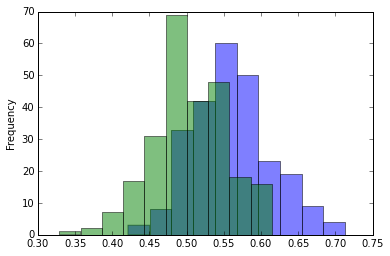

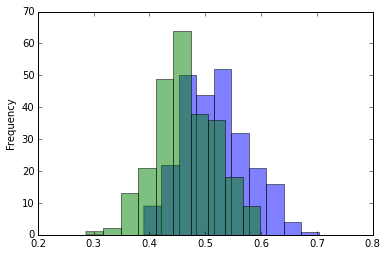

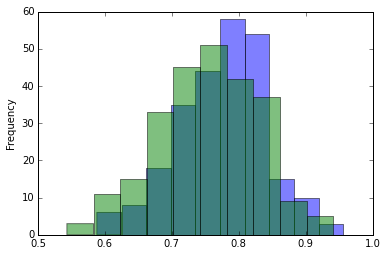

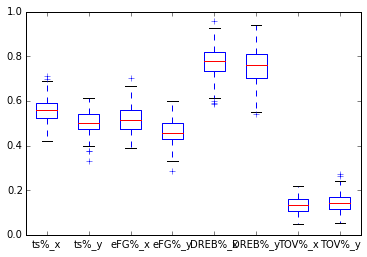

In [61]:


plt.figure();

games['ts%_x'].plot(kind='hist', alpha=0.5)
games['ts%_y'].plot(kind='hist', alpha=0.5)

plt.figure();
games['eFG%_x'].plot(kind='hist', alpha=0.5)
games['eFG%_y'].plot(kind='hist', alpha=0.5)

plt.figure();
games['DREB%_x'].plot(kind='hist', alpha=0.5)
games['DREB%_y'].plot(kind='hist', alpha=0.5)

plt.figure();
adv = games[['ts%_x','ts%_y','eFG%_x','eFG%_y','DREB%_x','DREB%_y','TOV%_x','TOV%_y']]
adv.plot(kind='box')


print ttest_ind(games['ts%_x'], games['ts%_y'])
print ttest_ind(games['eFG%_x'], games['eFG%_y'])
print ttest_ind(games['DREB%_x'], games['DREB%_y'])
print ttest_ind(games['TOV%_x'], games['TOV%_y'])


In [6]:
stats.sort(['W_PCT'], ascending=[False])

Y= stats.W_PCT
X = stats[['TS_PCT', 'DREB_PCT', 'OREB_PCT', 'TM_TOV_PCT','DEF_RATING']]
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/home/scott/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  W_PCT   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     100.0
Date:                Sun, 29 Nov 2015   Prob (F-statistic):           8.00e-15
Time:                        12:20:54   Log-Likelihood:                 52.684
No. Observations:                  29   AIC:                            -93.37
Df Residuals:                      23   BIC:                            -85.16
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.3403      0.831      2.815      0.010         0.620     4.060
TS_PCT         5.7569      0.663      8.690      0.000         4.386     7.127
DREB_PCT      -1.7945      0.690     -2.599      0.016        -3.223    -0.366
OREB_PCT       1.3903      0.425      3.268      0.003         0.510     2.270
TM_TOV_PCT    -1.8504      0.918     -2.016      0.056        -3.749     0.048
DEF_RATING    -0.0367      0.003    -10.538      0.000        -0.044    -0.029
==============================================================================
Omnibus:                        0.052   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.130
Skew:                          -0.080   Prob(JB):                        0.937
Kurtosis:                       2.713   Cond. No.                     1.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""